In [175]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
import utils_dagma
import networkx as nx

def load_data_39(n_nodes, s0, seed):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'v39/W_{n_nodes}_{n_nodes * s0}_{seed}.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'v44/v{n_nodes}_{n_nodes * s0}_option_5_OLS/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_true = X['W_true']
    X = X['X']
    B_true = (W_true != 0)
    
    return X, W, B_true, W_true

def load_data_44(n_nodes, s0, seed):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'v44/v{n_nodes}_{n_nodes * s0}_option_5_OLS/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    
    return W

def get_block(data, n_nodes=20, index=11, extract=None):
    data_dict = {
        11: data[:n_nodes, :n_nodes],
        12: data[:n_nodes, n_nodes:],
        21: data[n_nodes:, :n_nodes],
        22: data[n_nodes:, n_nodes:]
    }
    
    return data_dict[index]

In [209]:
def draw_single(G_X, G_Y, xlabel, title, ax, s0=6):
    n_out_w = {}
    n_in_w = {}
    
    n_nodes = G_X.number_of_nodes()
    n_edges = n_nodes * s0
    for n in G_X.nodes:
        n_out_w[n] = 0.
        n_in_w[n] = 0.
        for _, j, w in G_Y.out_edges(n, data='weight'):
            n_out_w[n] += abs(w)
        for i, _, w in G_Y.in_edges(n, data='weight'):
            n_in_w[n] += abs(w)
    
    Z_2_inout_deg = {}
    for i, j, z in G_X.edges(data='weight'):
        Z_2_inout_deg[n_out_w[i] * n_in_w[j] + np.random.normal(0, 1e-7)] = z
    
    sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.2, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("sum|i →| * sum|→ j|")
    ax.set_title(f"{title};\n {n_nodes} nodes, {n_edges} edges")

# === 60 nodes, 360 edges ===

# X ← dagma, W_est, X: |W_est| - |W_true|, Y: sum|i → | * sum| → j| B_true

In [28]:
W_est_1 = W_est.copy()
W_est_1[np.abs(W_est_1) < 0.3] = 0.
utils_dagma.count_accuracy(B_true, W_est_1 != 0., use_logger=False)

{'fdr': 0.6593001841620626,
 'tpr': 0.5138888888888888,
 'fpr': 0.25390070921985813,
 'shd': 524,
 'nnz': 543}

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

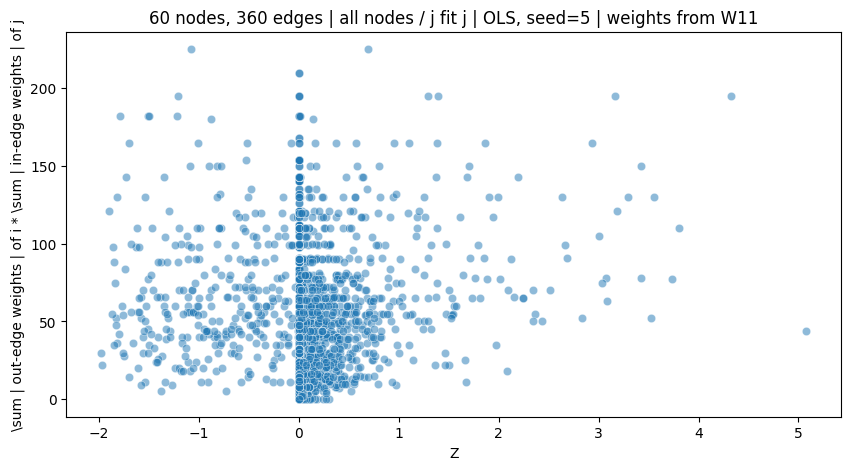

In [23]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
Z_pseudo = np.abs(W_est) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_B_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_B_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j] + np.random.normal(0, 1e-5)] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X ← dagma, W_est, X: |W_est| - |W_true| null edges, Y: sum|i → | * sum| → j| B_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

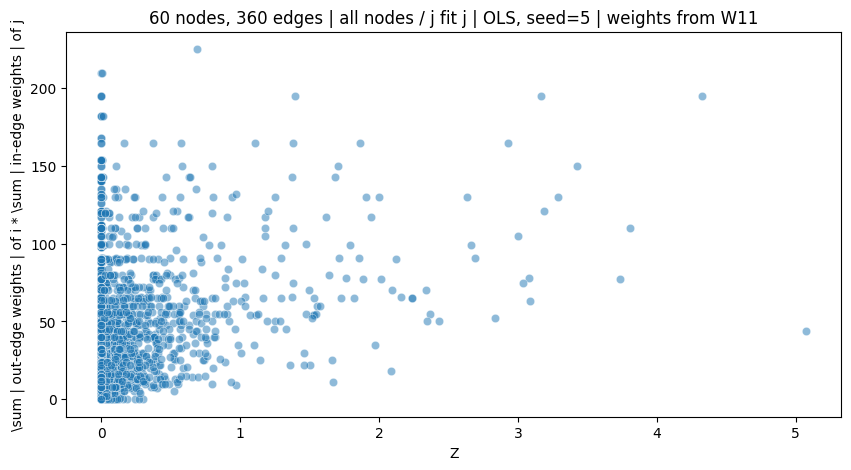

In [35]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
Z_pseudo = np.abs(W_est) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_B_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_B_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j] + np.random.normal(0, 1e-7)] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X ← dagma, W_est, X: |W_est| - |W_true|, Y: sum|i → | * sum| → j| W_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

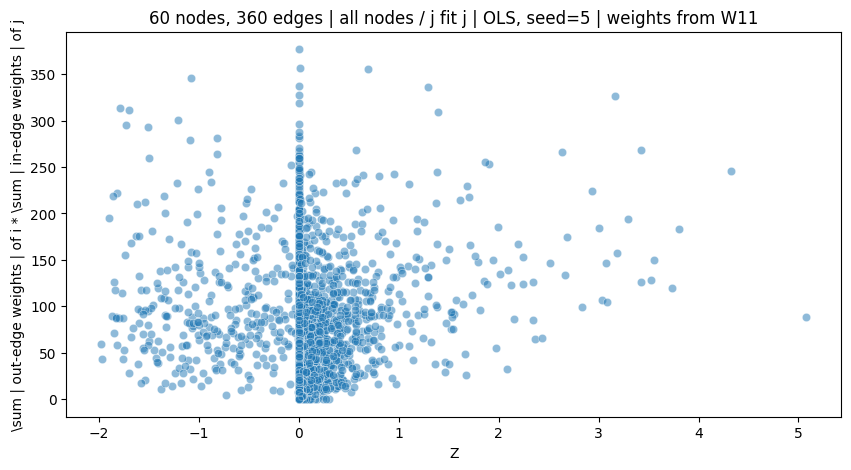

In [12]:
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
Z_pseudo = np.abs(W_est) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j] + np.random.normal(0, 1e-5)] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X ← dagma, W_est, X: |W_est| - |W_true| null edges, Y: sum|i → | * sum| → j| W_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

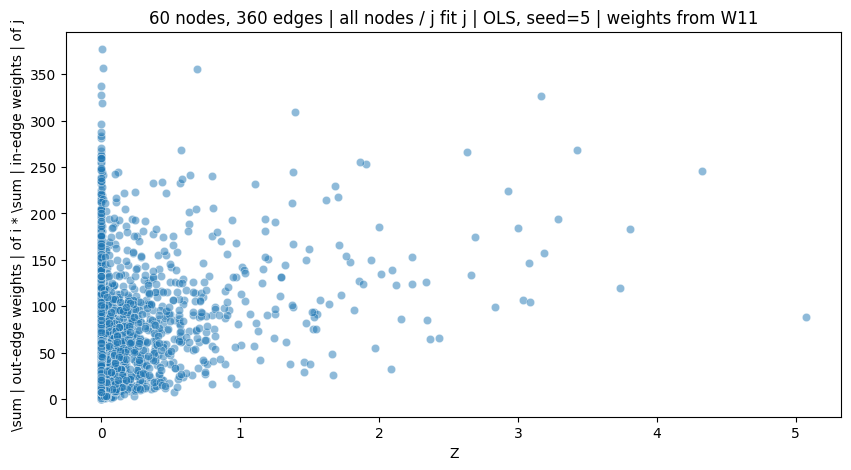

In [32]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
Z_pseudo = np.abs(W_est) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X ← dagma, W_est, X: |W_est| - |W_true|, Y: sum|i → | * sum| → j| W_est

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

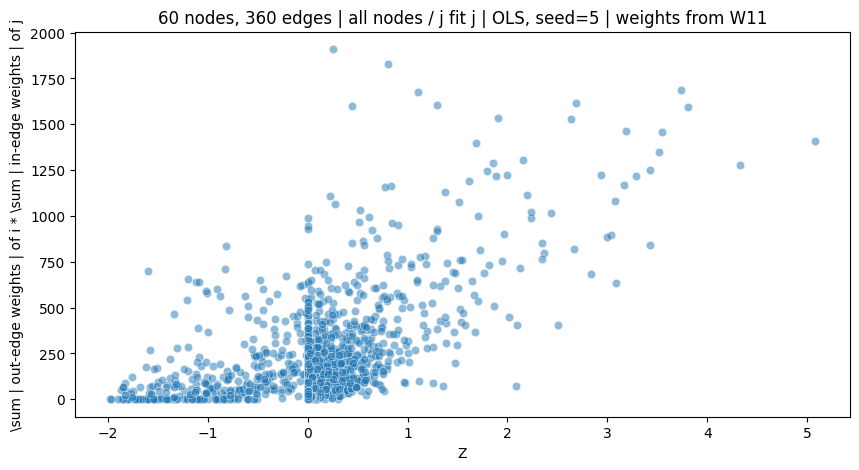

In [20]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
Z_pseudo = np.abs(W_est) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_est.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_est.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X ← dagma, W_est, X: |W_est| - |W_true| null edges, Y: sum|i → | * sum| → j| W_est

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

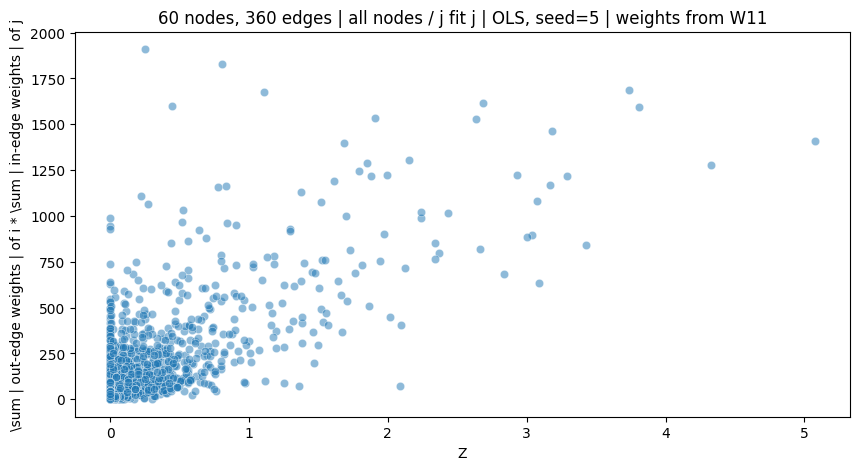

In [31]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
Z_pseudo = np.abs(W_est) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_est.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_est.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# Organize

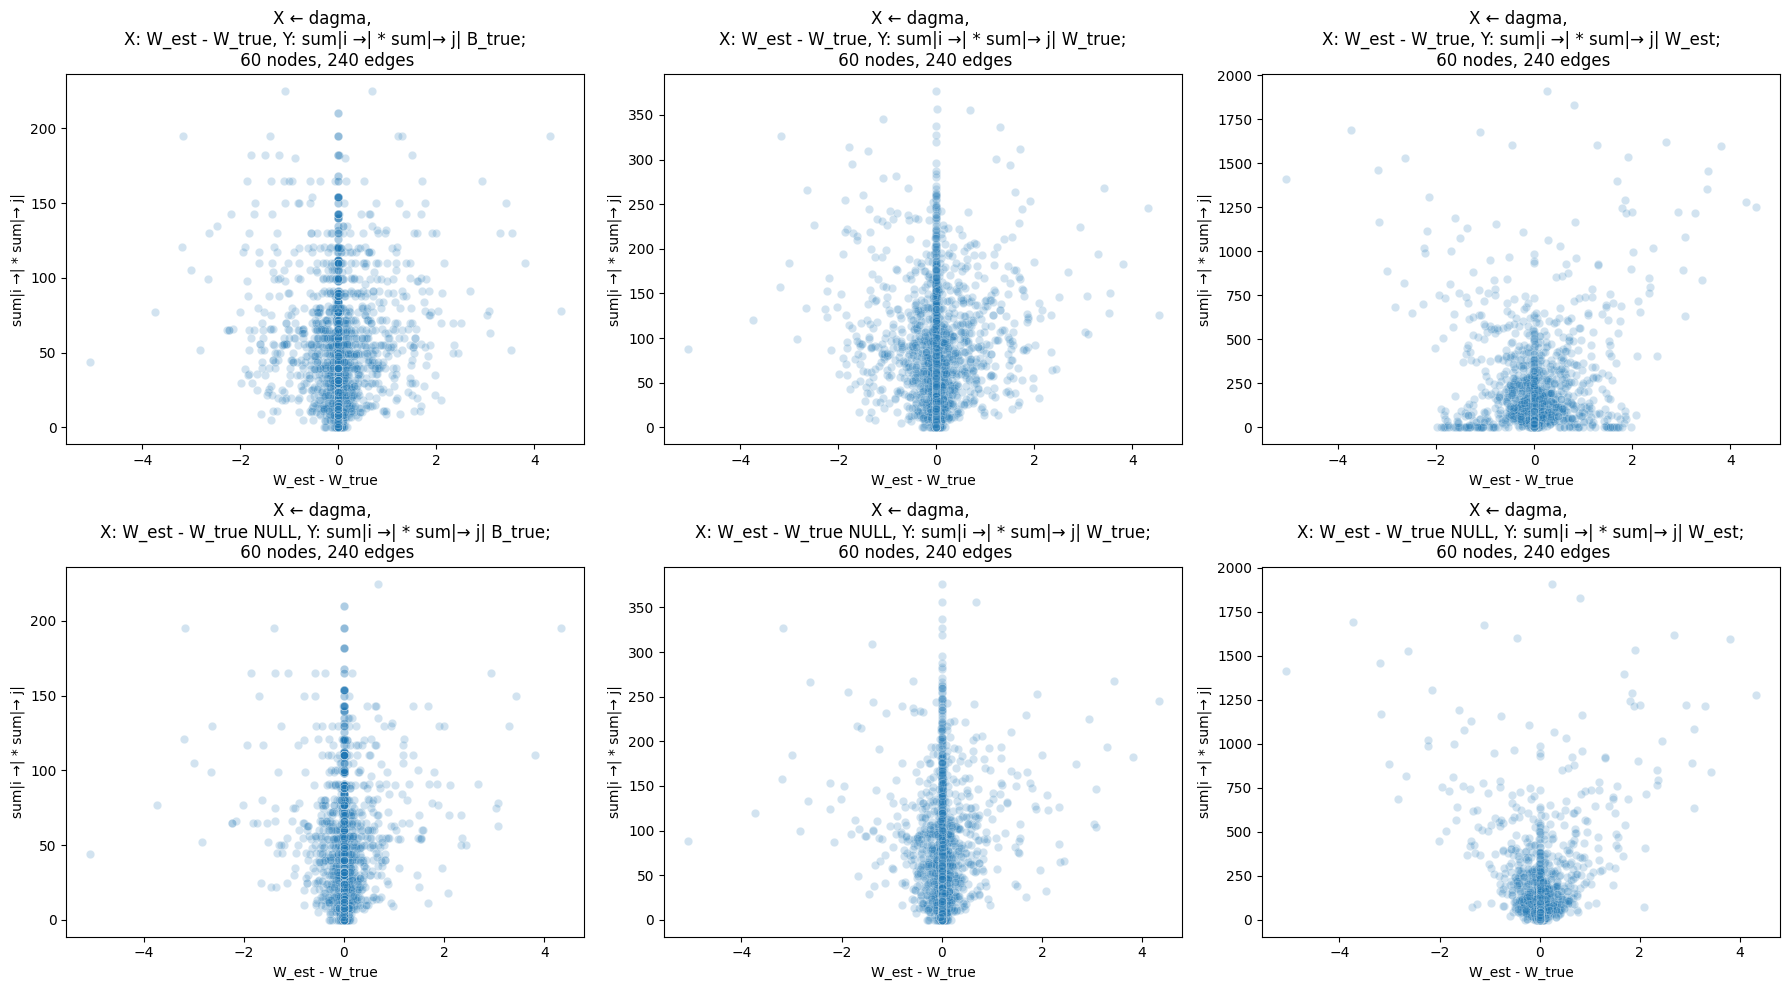

In [212]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_39 = G_W_est

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

"""
X ← dagma, X: W_est - W_true, Y: sum|i →| * sum|→ j| B_true
"""
Z_pseudo = W_est - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
draw_single(G_Z_pseudo, G_B_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true, Y: sum|i →| * sum|→ j| B_true', ax=axs[0][0], s0=4)

"""
X ← dagma, X: W_est - W_true null, Y: sum|i →| * sum|→ j| B_true
"""
Z_pseudo = W_est - W_true
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_B_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true NULL, Y: sum|i →| * sum|→ j| B_true', ax=axs[1][0], s0=4)

"""
X ← dagma, X: W_est - W_true, Y: sum|i →| * sum|→ j| W_true
"""
Z_pseudo = W_est - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
draw_single(G_Z_pseudo, G_W_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true, Y: sum|i →| * sum|→ j| W_true', ax=axs[0][1], s0=4)

"""
X ← dagma, X: W_est - W_true null, Y: sum|i →| * sum|→ j| W_true
"""
Z_pseudo = W_est - W_true
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true NULL, Y: sum|i →| * sum|→ j| W_true', ax=axs[1][1], s0=4)

"""
X ← dagma, X: W_est - W_true, Y: sum|i →| * sum|→ j| W_est
"""
Z_pseudo = W_est - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
draw_single(G_Z_pseudo, G_W_est, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true, Y: sum|i →| * sum|→ j| W_est', ax=axs[0][2], s0=4)

"""
X ← dagma, X: W_est - W_true null, Y: sum|i →| * sum|→ j| W_est
"""
Z_pseudo = W_est - W_true
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_est, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true NULL, Y: sum|i →| * sum|→ j| W_est', ax=axs[1][2], s0=4)


plt.tight_layout()

In [116]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)

In [117]:
G_W_true.number_of_edges()

360

In [113]:
G_W_est.number_of_edges()

3540

Text(0, 0.5, 'sum|i->| * sum|->j| W_true')

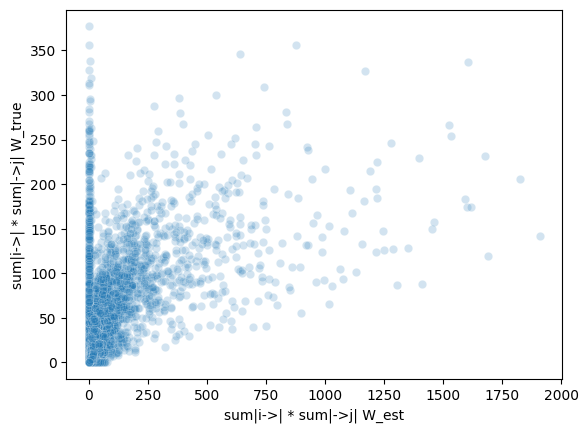

In [127]:
X, Y = [], []
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)

for i, j in G_W_est_39.edges():
    X.append(n_out_w_39[i] * n_in_w_39[j])
    Y.append(n_out_w_true[i] * n_in_w_true[j])
ax = sns.scatterplot(x=X, y=Y, alpha=0.2)   
plt.xlabel("sum|i->| * sum|->j| W_est")
plt.ylabel("sum|i->| * sum|->j| W_true")

(-95.45788620549624, 2004.6159797857572)

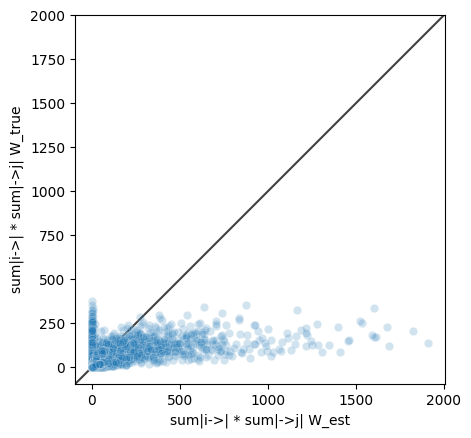

In [126]:
X, Y = [], []
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)

for i, j in G_W_est_39.edges():
    X.append(n_out_w_39[i] * n_in_w_39[j])
    Y.append(n_out_w_true[i] * n_in_w_true[j])
ax = sns.scatterplot(x=X, y=Y, alpha=0.2)   
plt.xlabel("sum|i->| * sum|->j| W_est")
plt.ylabel("sum|i->| * sum|->j| W_true")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

Text(0.5, 1.0, 'in_deg')

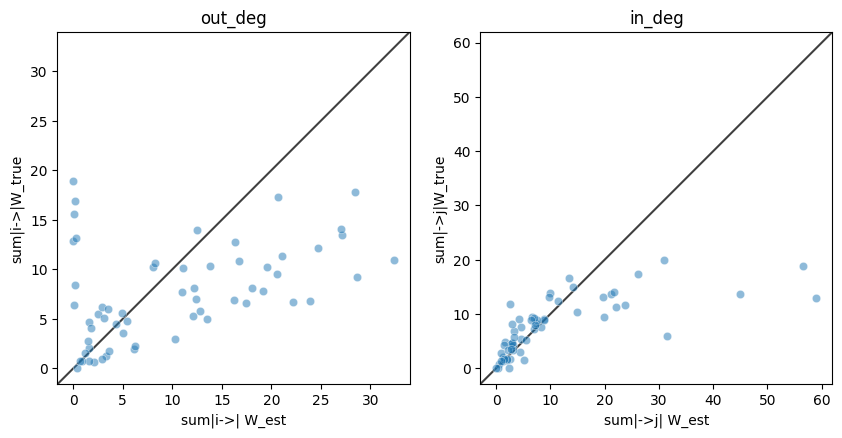

In [137]:
X, Y = [], []
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X, Y = [], []

for i in G_W_est_39.nodes():
    X.append(n_out_w_39[i])
    Y.append(n_out_w_true[i])
ax = sns.scatterplot(x=X, y=Y, alpha=0.5, ax=axs[0])   
ax.set_xlabel("sum|i->| W_est")
ax.set_ylabel("sum|i->|W_true")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("out_deg")

""""""
X, Y = [], []

for i in G_W_est_39.nodes():
    X.append(n_in_w_39[i])
    Y.append(n_in_w_true[i])
ax = sns.scatterplot(x=X, y=Y, alpha=0.5, ax=axs[1])   
ax.set_xlabel("sum|->j| W_est")
ax.set_ylabel("sum|->j|W_true")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("in_deg")

In [124]:
max(X)

926.0687029824294

In [118]:
G_W_true.edges()

OutEdgeView([(0, 20), (0, 30), (0, 37), (0, 48), (0, 53), (1, 5), (1, 6), (1, 42), (1, 43), (1, 55), (1, 59), (2, 12), (2, 37), (2, 46), (2, 55), (3, 11), (3, 29), (3, 30), (3, 35), (3, 44), (3, 48), (3, 55), (3, 56), (3, 59), (4, 6), (4, 26), (4, 27), (4, 31), (4, 59), (5, 2), (6, 12), (6, 24), (7, 2), (7, 3), (7, 9), (7, 11), (7, 19), (7, 24), (7, 26), (7, 27), (7, 39), (7, 44), (8, 6), (8, 11), (8, 35), (8, 52), (8, 53), (8, 59), (9, 14), (9, 21), (9, 27), (9, 29), (9, 33), (9, 38), (9, 43), (10, 1), (10, 5), (10, 35), (10, 37), (10, 38), (10, 46), (10, 49), (10, 54), (10, 55), (10, 59), (11, 21), (11, 28), (11, 43), (11, 46), (12, 28), (13, 2), (13, 11), (14, 12), (14, 20), (14, 53), (15, 12), (15, 13), (15, 23), (15, 24), (15, 34), (15, 36), (15, 37), (15, 38), (15, 52), (16, 7), (16, 9), (16, 15), (16, 21), (16, 27), (16, 31), (16, 32), (16, 36), (16, 37), (16, 38), (16, 41), (16, 48), (16, 55), (16, 56), (17, 2), (17, 12), (17, 29), (17, 42), (17, 43), (18, 6), (18, 10), (18, 15

# Below are all NULL edges

# X + X' ← dagma, W_est, X: |W11| - |W_true|, Y: sum|i → | * sum| → j| B_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

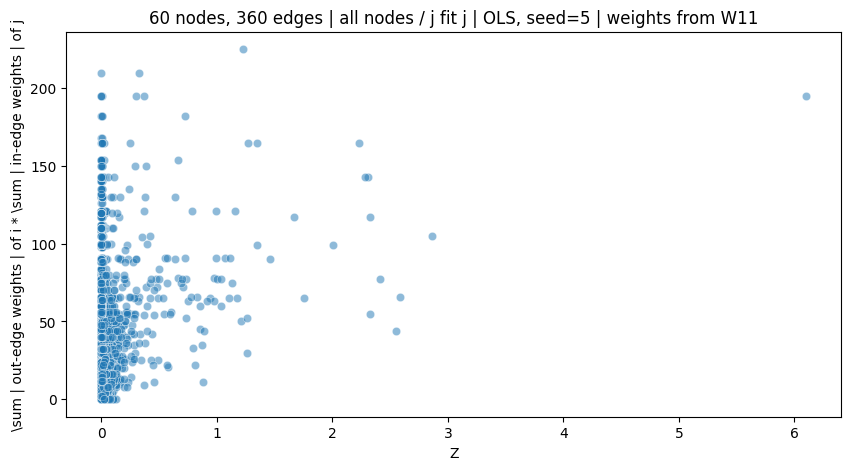

In [54]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_B_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_B_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]+np.random.normal(0, 1e-7)] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W21|, Y: sum|i → | * sum| → j| B_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

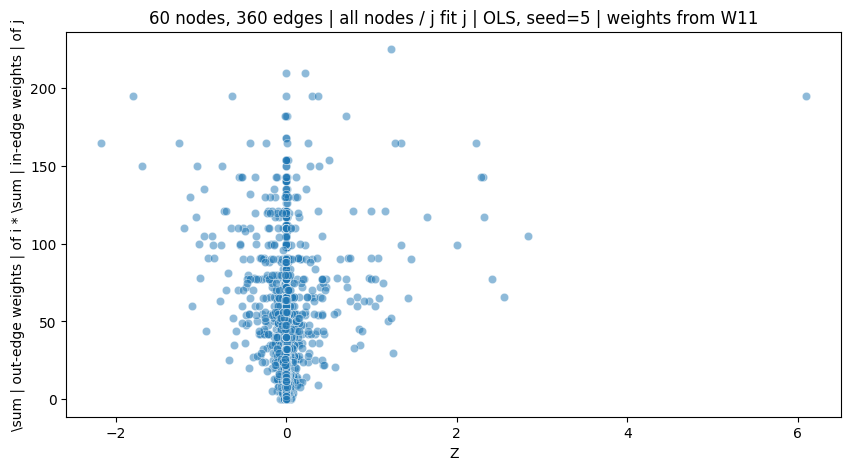

In [55]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W21)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_B_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_B_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]+np.random.normal(0, 1e-7)] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W_true|, Y: sum|i → | * sum| → j| W_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

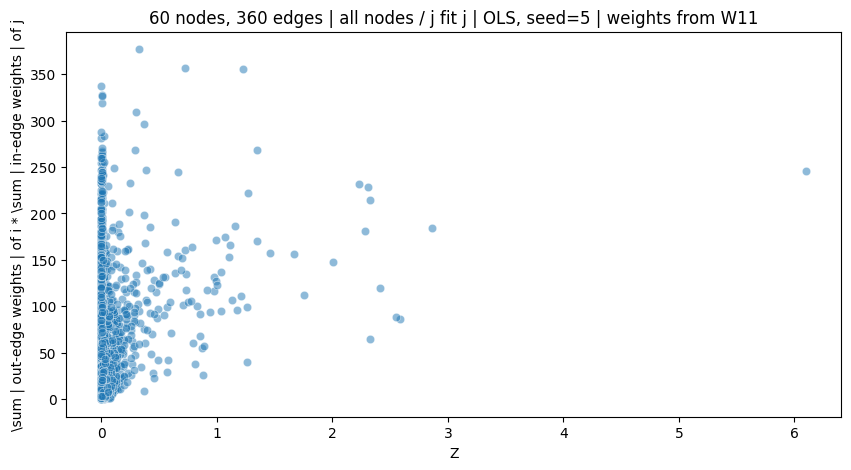

In [51]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W21|, Y: sum|i → | * sum| → j| W_true

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

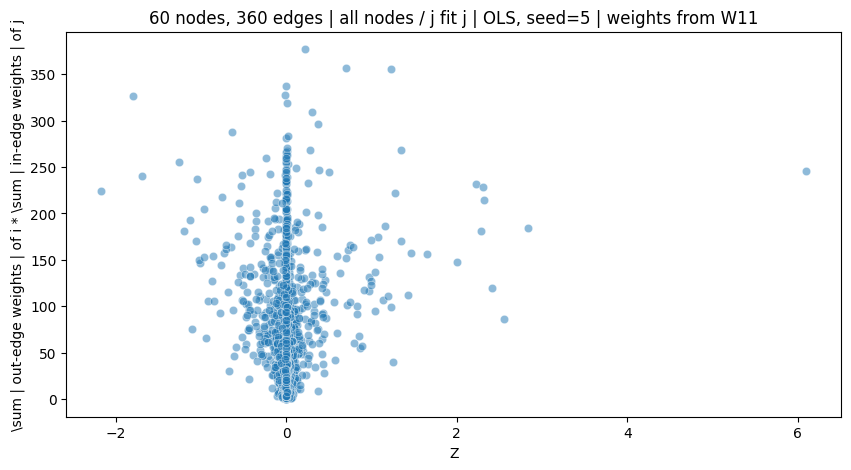

In [52]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W21)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W_true|, Y: sum|i → | * sum| → j| W_est_44

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

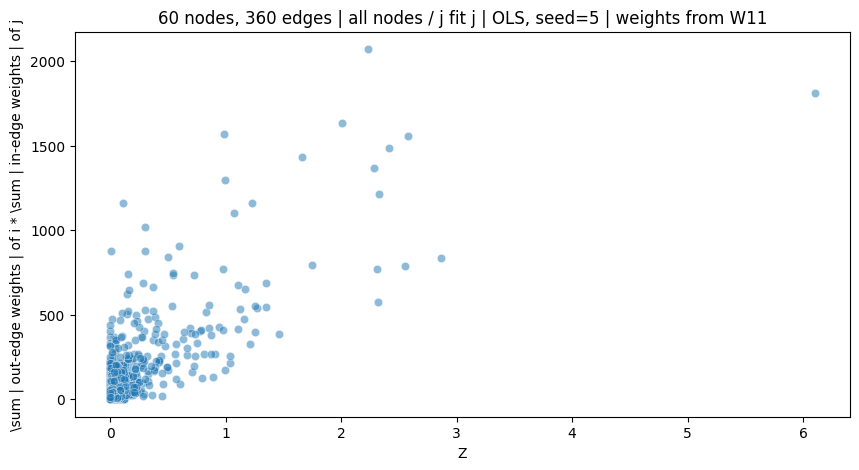

In [49]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_est_44.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_est_44.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W21|, Y: sum|i → | * sum| → j| W_est_44

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

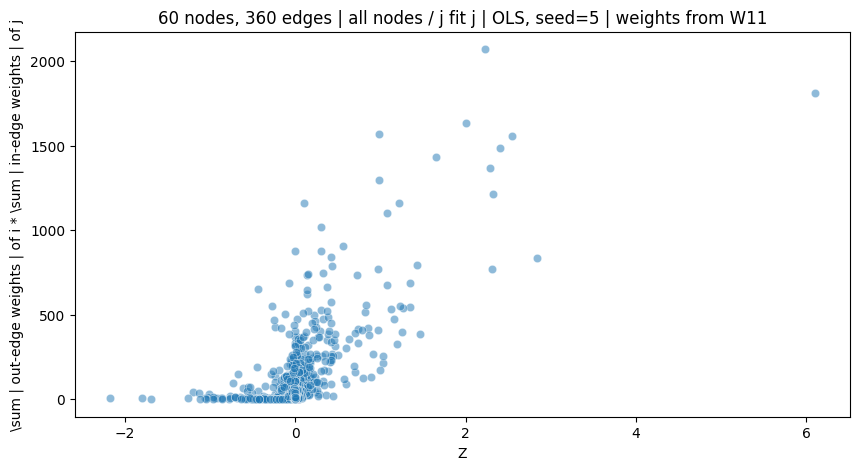

In [59]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W21)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_est_44.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_est_44.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W_true|, Y: sum|i → | * sum| → j| W_est_39

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

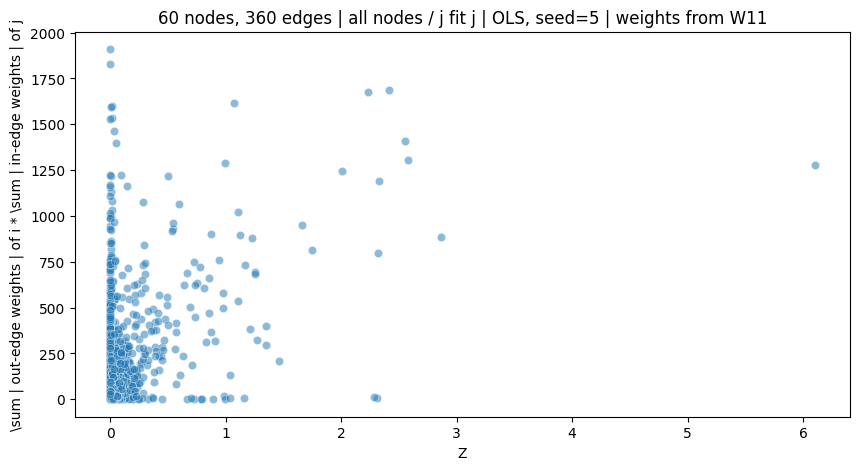

In [56]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W_true)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_est.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_est.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# X + X' ← dagma, W_est, X: |W11| - |W21|, Y: sum|i → | * sum| → j| W_est_39

Text(0.5, 1.0, '60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11')

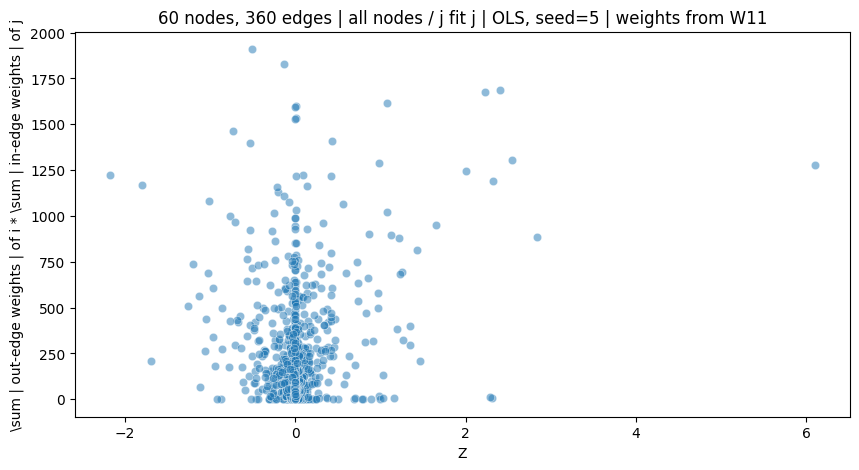

In [84]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
Z_pseudo = np.abs(W11) - np.abs(W21)
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)

plt.figure(figsize=(10, 5))
n_out_w = {}
n_in_w = {}

for n in G_B_true.nodes:
    n_out_w[n] = 0.
    n_in_w[n] = 0.
    for _, j, w in G_W_est.out_edges(n, data='weight'):
        n_out_w[n] += abs(w)
    for i, _, w in G_W_est.in_edges(n, data='weight'):
        n_in_w[n] += abs(w)

Z_2_inout_deg = {}
for i, j, z in G_Z_pseudo_null.edges(data='weight'):
    Z_2_inout_deg[n_out_w[i] * n_in_w[j]] = z

sns.scatterplot(x=list(Z_2_inout_deg.values()), y=list(Z_2_inout_deg.keys()), alpha=0.5)
plt.xlabel("Z")
plt.ylabel("\sum | out-edge weights | of i * \sum | in-edge weights | of j")
plt.title("60 nodes, 360 edges | all nodes / j fit j | OLS, seed=5 | weights from W11")

# Organize

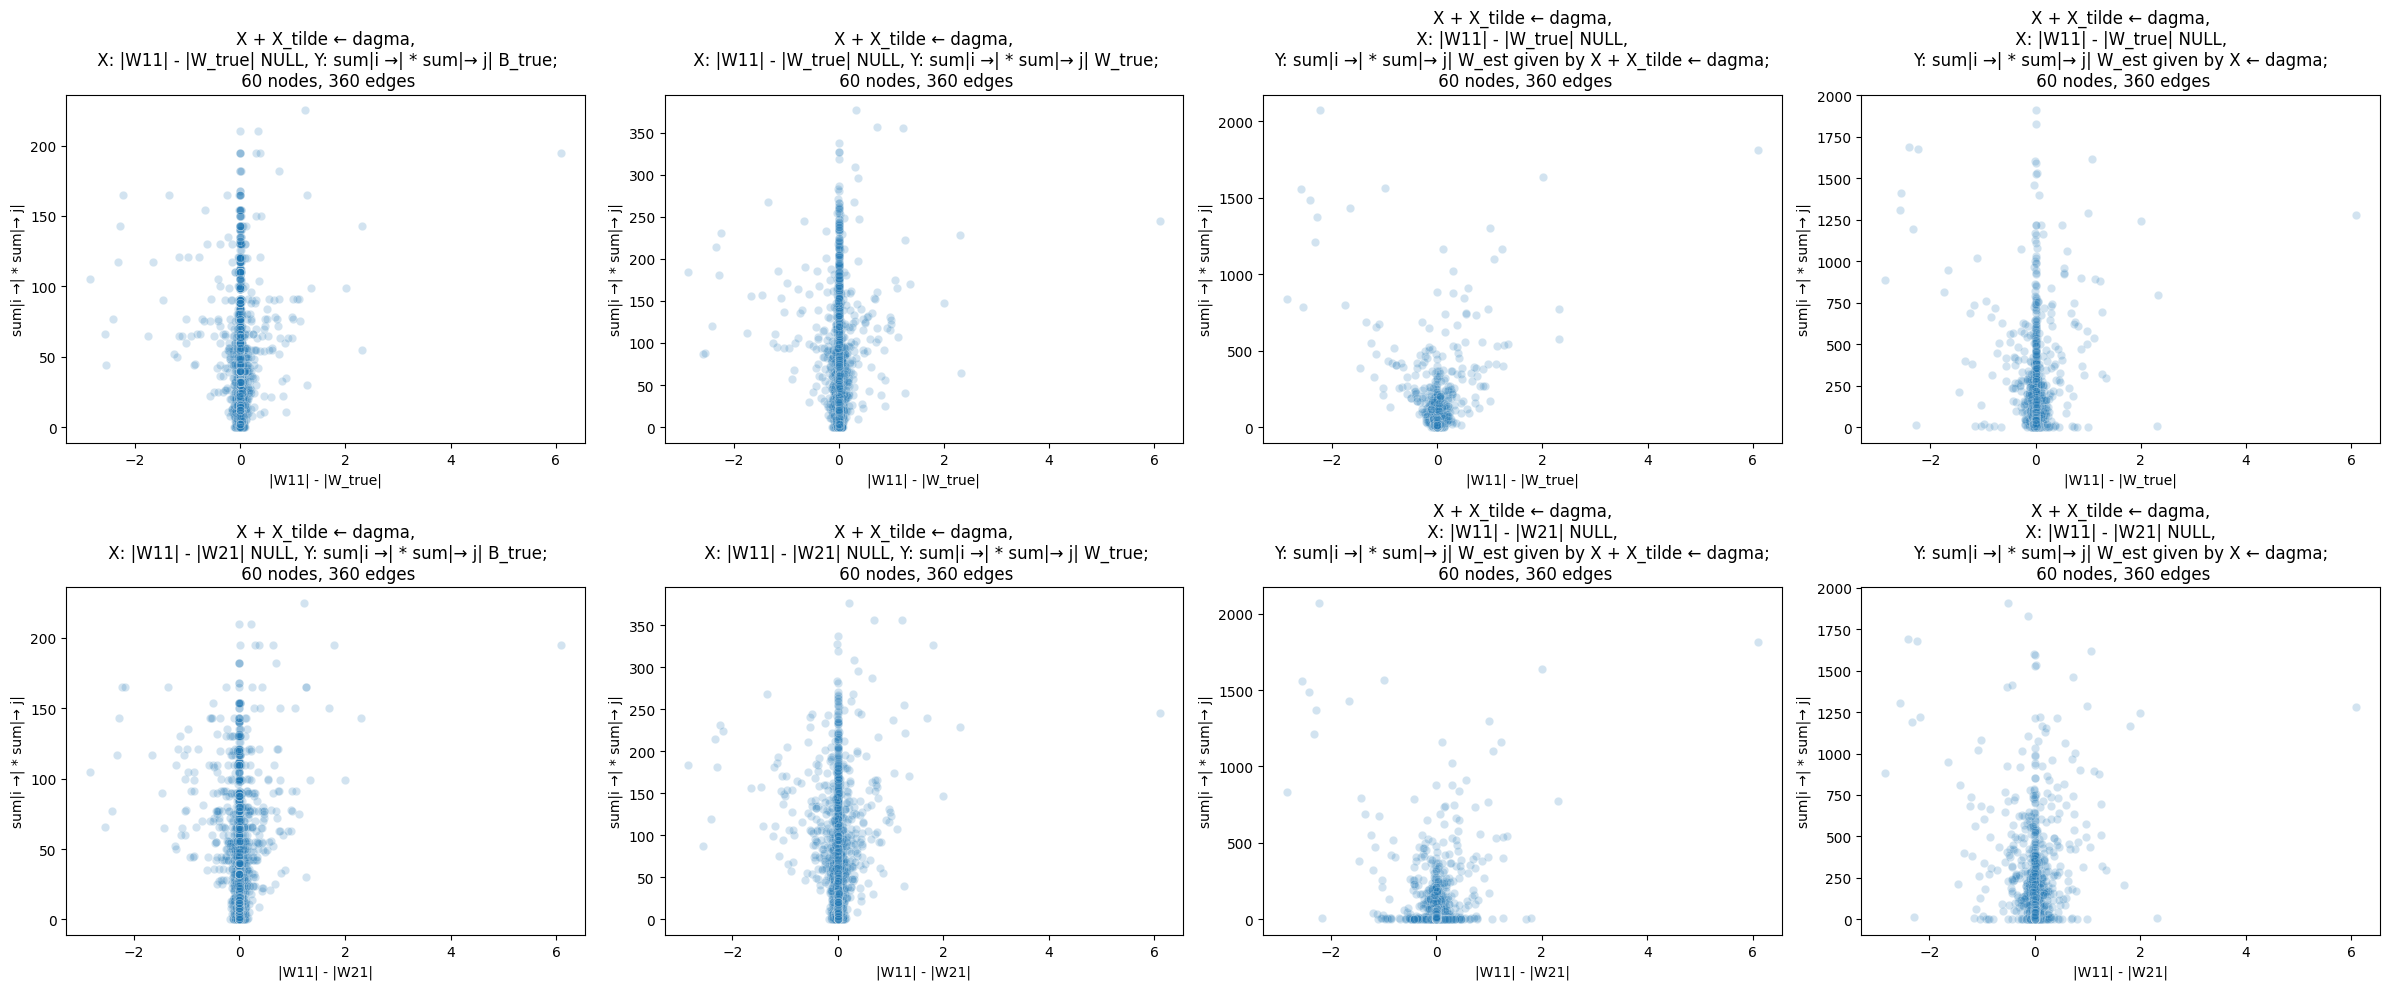

In [136]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
W_est_44 = load_data_44(60, 6, 1)
W_est_44 = W_est_44['W_est']
W11, W21 = get_block(W_est_44, n_nodes=60, index=11), get_block(W_est_44, n_nodes=60, index=21)

G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_44 = nx.DiGraph(W_est_44)
G_W_est_39 = G_W_est

fig, axs = plt.subplots(2, 4, figsize=(24, 10))

"""
X + X' ← dagma, X: |W11| - |W_true| null, Y: sum|i →| * sum|→ j| B_true
"""
Z_pseudo = W11 - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_B_true, xlabel='|W11| - |W_true|', title='X + X_tilde ← dagma,\n X: |W11| - |W_true| NULL, Y: sum|i →| * sum|→ j| B_true', ax=axs[0][0])

"""
X + X' ← dagma, X: |W11| - |W21| null, Y: sum|i →| * sum|→ j| B_true
"""
Z_pseudo = W11 - W21
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_B_true, xlabel='|W11| - |W21|', title='X + X_tilde ← dagma,\n X: |W11| - |W21| NULL, Y: sum|i →| * sum|→ j| B_true', ax=axs[1][0])

"""
X + X' ← dagma, X: |W11| - |W_true| null, Y: sum|i →| * sum|→ j| W_true
"""
Z_pseudo = W11 - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_true, xlabel='|W11| - |W_true|', title='X + X_tilde ← dagma,\n X: |W11| - |W_true| NULL, Y: sum|i →| * sum|→ j| W_true', ax=axs[0][1])

"""
X + X' ← dagma, X: |W11| - |W21| null, Y: sum|i →| * sum|→ j| W_true
"""
Z_pseudo = W11 - W21
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_true, xlabel='|W11| - |W21|', title='X + X_tilde ← dagma,\n X: |W11| - |W21| NULL, Y: sum|i →| * sum|→ j| W_true', ax=axs[1][1])

"""
X + X' ← dagma, X: |W11| - |W_true| null, Y: sum|i →| * sum|→ j| W_est given by X + X' ← dagma
"""
Z_pseudo = W11 - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_est_44, xlabel='|W11| - |W_true|', title='X + X_tilde ← dagma,\n X: |W11| - |W_true| NULL, \nY: sum|i →| * sum|→ j| W_est given by X + X_tilde ← dagma', ax=axs[0][2])

"""
X + X' ← dagma, X: |W11| - |W21| null, Y: sum|i →| * sum|→ j| W_est given by X + X' ← dagma
"""
Z_pseudo = W11 - W21
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_est_44, xlabel='|W11| - |W21|', title='X + X_tilde ← dagma,\n X: |W11| - |W21| NULL, \nY: sum|i →| * sum|→ j| W_est given by X + X_tilde ← dagma', ax=axs[1][2])

"""
X + X' ← dagma, X: |W11| - |W_true| null, Y: sum|i →| * sum|→ j| W_est given by X ← dagma
"""
Z_pseudo = W11 - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_est_39, xlabel='|W11| - |W_true|', title='X + X_tilde ← dagma,\n X: |W11| - |W_true| NULL, \nY: sum|i →| * sum|→ j| W_est given by X ← dagma', ax=axs[0][3])

"""
X + X' ← dagma, X: |W11| - |W21| null, Y: sum|i →| * sum|→ j| W_est given by X ← dagma
"""
Z_pseudo = W11 - W21
G_Z_pseudo = nx.DiGraph(Z_pseudo)
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_est_39, xlabel='|W11| - |W21|', title='X + X_tilde ← dagma,\n X: |W11| - |W21| NULL, \nY: sum|i →| * sum|→ j| W_est given by X ← dagma', ax=axs[1][3])


plt.tight_layout()

# === 20 nodes, 80 edges ===

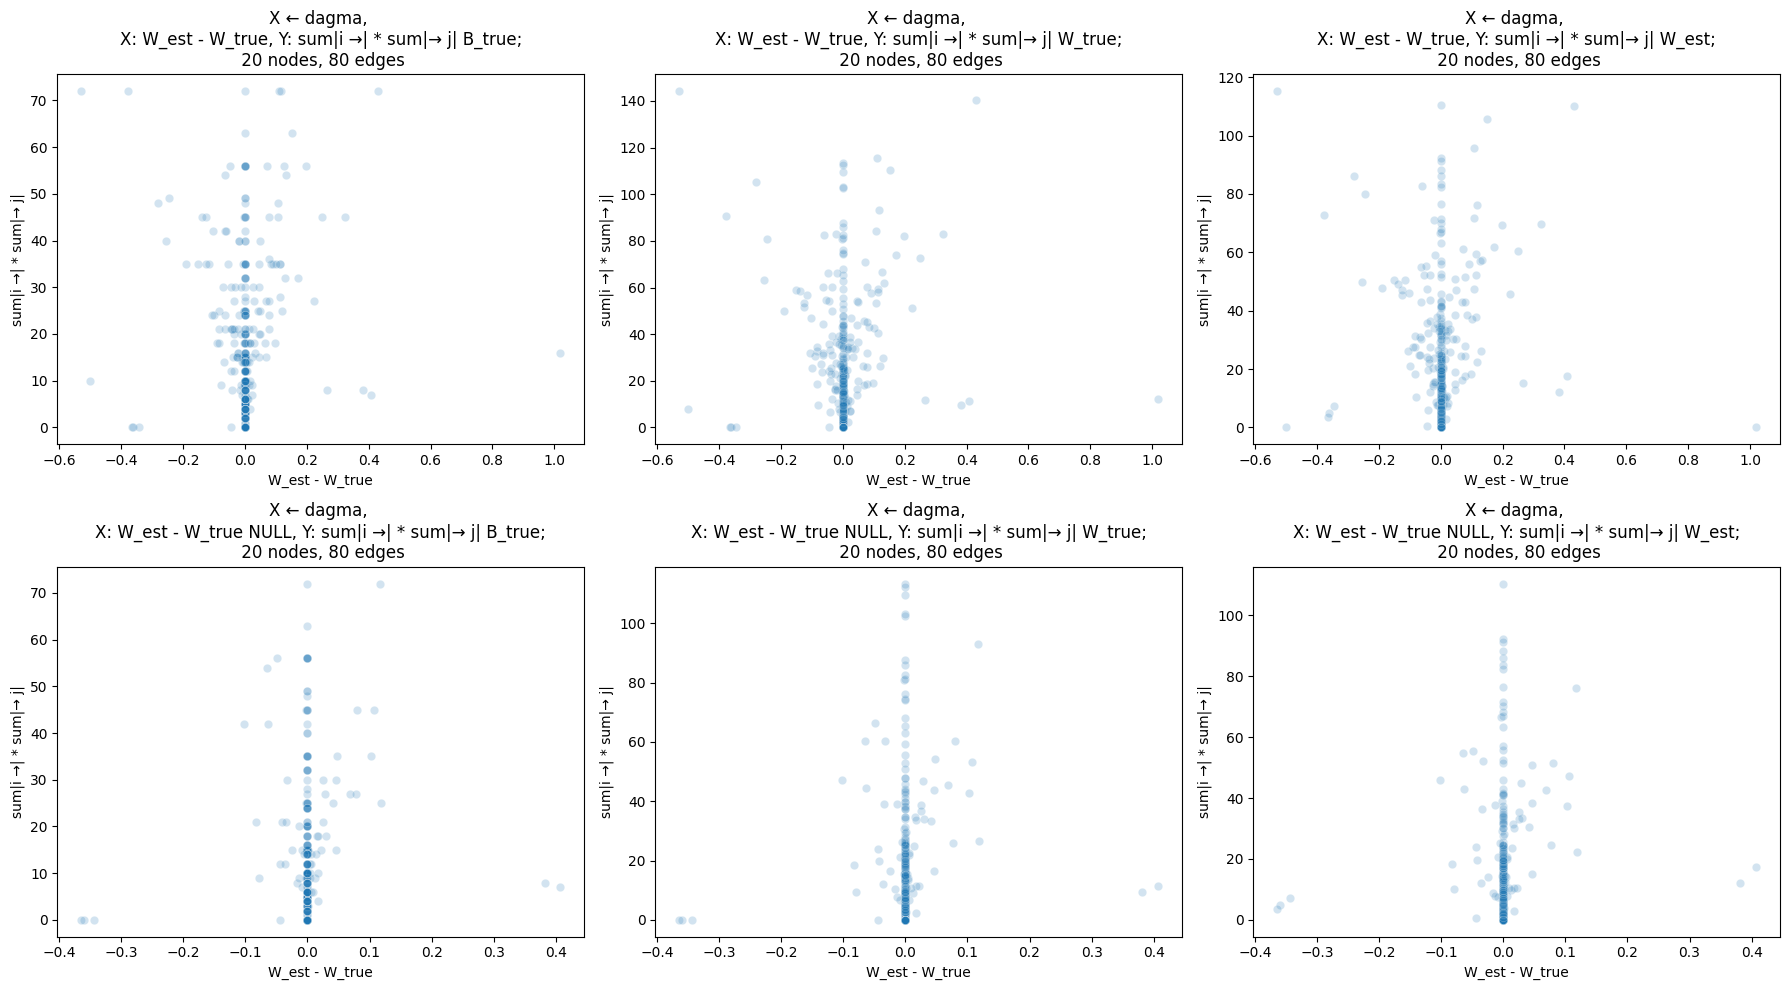

In [210]:
X, W_est, B_true, W_true = load_data_39(20, 4, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_39 = G_W_est

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

"""
X ← dagma, X: W_est - W_true, Y: sum|i →| * sum|→ j| B_true
"""
Z_pseudo = W_est - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
draw_single(G_Z_pseudo, G_B_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true, Y: sum|i →| * sum|→ j| B_true', ax=axs[0][0], s0=4)

"""
X ← dagma, X: W_est - W_true null, Y: sum|i →| * sum|→ j| B_true
"""
Z_pseudo = W_est - W_true
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_B_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true NULL, Y: sum|i →| * sum|→ j| B_true', ax=axs[1][0], s0=4)

"""
X ← dagma, X: W_est - W_true, Y: sum|i →| * sum|→ j| W_true
"""
Z_pseudo = W_est - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
draw_single(G_Z_pseudo, G_W_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true, Y: sum|i →| * sum|→ j| W_true', ax=axs[0][1], s0=4)

"""
X ← dagma, X: W_est - W_true null, Y: sum|i →| * sum|→ j| W_true
"""
Z_pseudo = W_est - W_true
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_true, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true NULL, Y: sum|i →| * sum|→ j| W_true', ax=axs[1][1], s0=4)

"""
X ← dagma, X: W_est - W_true, Y: sum|i →| * sum|→ j| W_est
"""
Z_pseudo = W_est - W_true
G_Z_pseudo = nx.DiGraph(Z_pseudo)
draw_single(G_Z_pseudo, G_W_est, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true, Y: sum|i →| * sum|→ j| W_est', ax=axs[0][2], s0=4)

"""
X ← dagma, X: W_est - W_true null, Y: sum|i →| * sum|→ j| W_est
"""
Z_pseudo = W_est - W_true
Z_pseudo_null = Z_pseudo.copy()
Z_pseudo_null[B_true] = 0.
G_Z_pseudo_null = nx.DiGraph(Z_pseudo_null)
draw_single(G_Z_pseudo_null, G_W_est, xlabel='W_est - W_true', title='X ← dagma, \nX: W_est - W_true NULL, Y: sum|i →| * sum|→ j| W_est', ax=axs[1][2], s0=4)


plt.tight_layout()

Text(0.5, 1.0, 'in_deg')

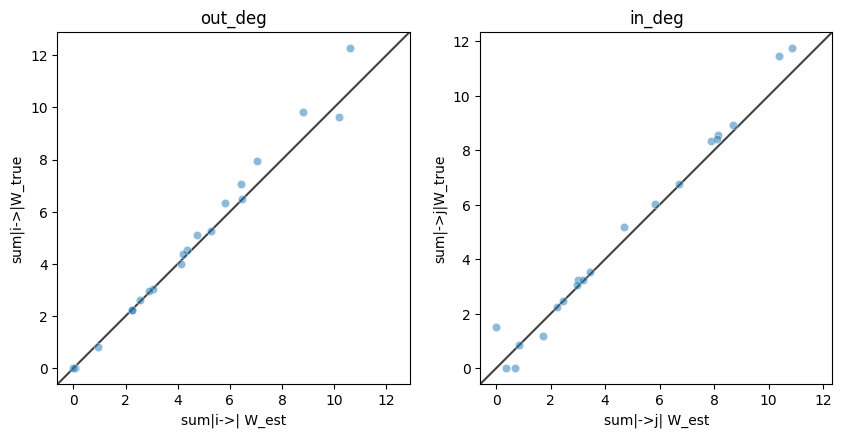

In [151]:
X, Y = [], []
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X, Y = [], []

for i in G_W_est_39.nodes():
    X.append(n_out_w_39[i])
    Y.append(n_out_w_true[i])
ax = sns.scatterplot(x=X, y=Y, alpha=0.5, ax=axs[0])   
ax.set_xlabel("sum|i->| W_est")
ax.set_ylabel("sum|i->|W_true")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("out_deg")

""""""
X, Y = [], []

for i in G_W_est_39.nodes():
    X.append(n_in_w_39[i])
    Y.append(n_in_w_true[i])
ax = sns.scatterplot(x=X, y=Y, alpha=0.5, ax=axs[1])   
ax.set_xlabel("sum|->j| W_est")
ax.set_ylabel("sum|->j|W_true")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("in_deg")

Text(0.5, 1.0, 'X: out-deg, Y: in-deg | 60 nodes, 360 edges, seed=1')

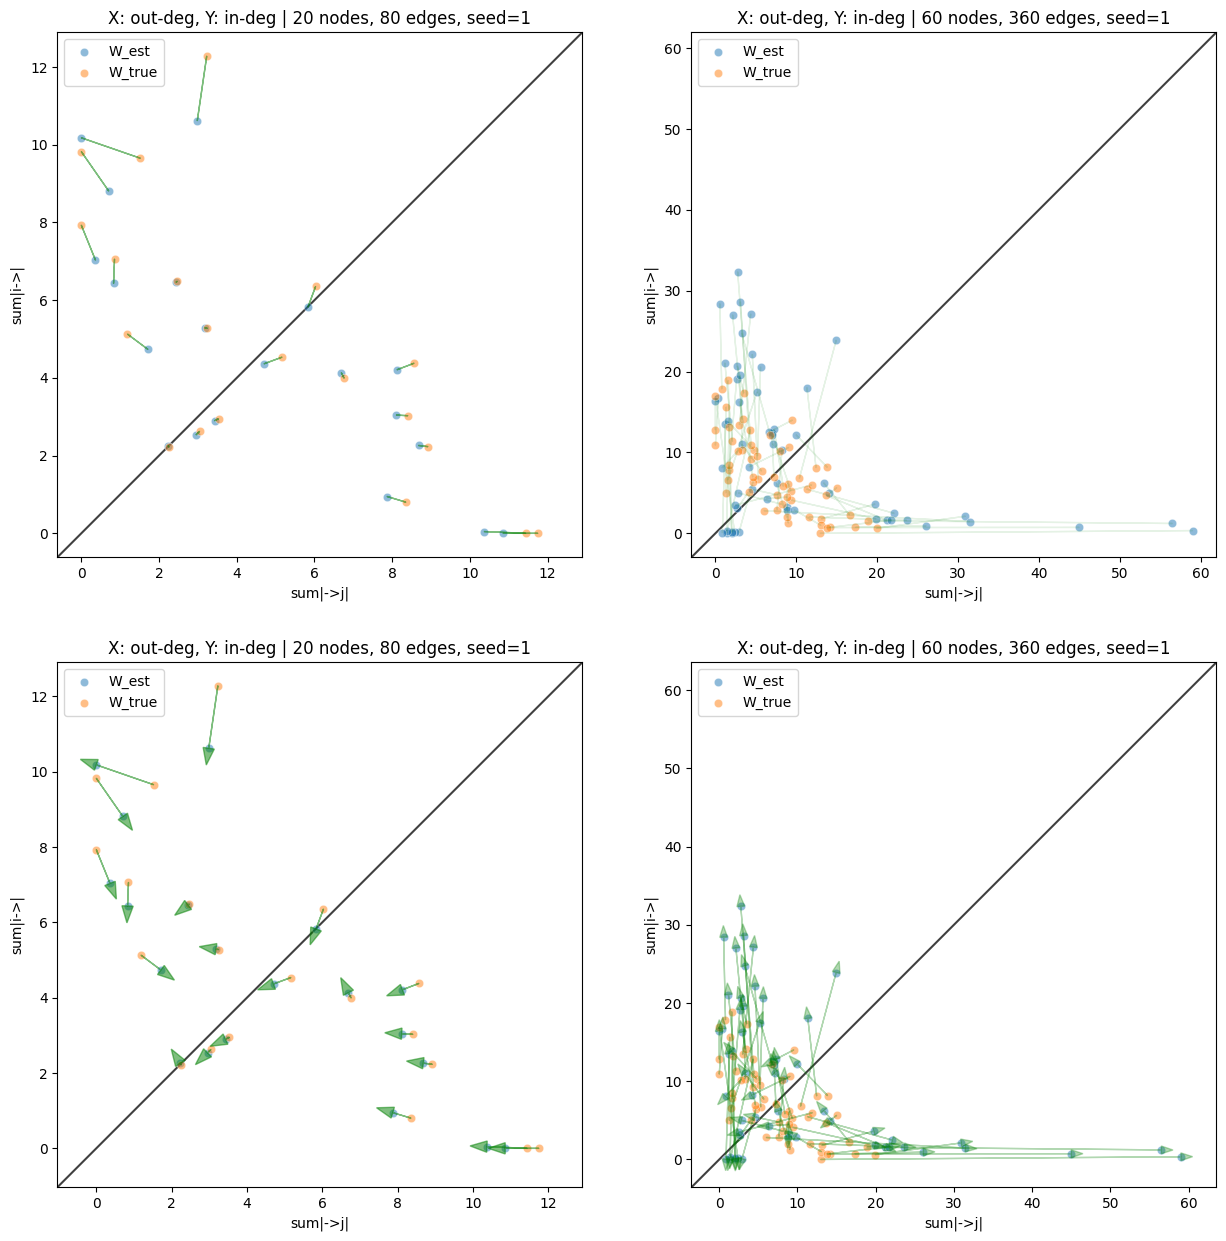

In [203]:
X, W_est, B_true, W_true = load_data_39(20, 4, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_39 = G_W_est

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
"""
draw
"""
ax = axs[0][0]
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X_est, Y_est = [], []

for i in G_W_est_39.nodes():
    X_est.append(n_in_w_39[i])
    Y_est.append(n_out_w_39[i])
sns.scatterplot(x=X_est, y=Y_est, alpha=0.5, ax=ax, label='W_est')   

""""""
X_true, Y_true = [], []

for i in G_W_est_39.nodes():
    X_true.append(n_in_w_true[i])
    Y_true.append(n_out_w_true[i])
sns.scatterplot(x=X_true, y=Y_true, alpha=0.5, ax=ax, label="W_true")   
ax.set_xlabel("sum|->j|")
ax.set_ylabel("sum|i->|")

for x_est, y_est, x_true, y_true in zip(X_est, Y_est, X_true, Y_true):
    ax.arrow(x=x_true, y=y_true, dx=x_est-x_true, dy=y_est-y_true, color='green', alpha=0.5)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("X: out-deg, Y: in-deg | 20 nodes, 80 edges, seed=1")

"""
draw
"""
ax = axs[1][0]
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X_est, Y_est = [], []

for i in G_W_est_39.nodes():
    X_est.append(n_in_w_39[i])
    Y_est.append(n_out_w_39[i])
sns.scatterplot(x=X_est, y=Y_est, alpha=0.5, ax=ax, label='W_est')   

""""""
X_true, Y_true = [], []

for i in G_W_est_39.nodes():
    X_true.append(n_in_w_true[i])
    Y_true.append(n_out_w_true[i])
sns.scatterplot(x=X_true, y=Y_true, alpha=0.5, ax=ax, label="W_true")   
ax.set_xlabel("sum|->j|")
ax.set_ylabel("sum|i->|")

for x_est, y_est, x_true, y_true in zip(X_est, Y_est, X_true, Y_true):
    ax.arrow(x=x_true, y=y_true, dx=x_est-x_true, dy=y_est-y_true, head_width=.3, color='green', alpha=0.5)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("X: out-deg, Y: in-deg | 20 nodes, 80 edges, seed=1")


X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_39 = G_W_est

"""
draw
"""

ax = axs[0][1]
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X_est, Y_est = [], []

for i in G_W_est_39.nodes():
    X_est.append(n_in_w_39[i])
    Y_est.append(n_out_w_39[i])
sns.scatterplot(x=X_est, y=Y_est, alpha=0.5, ax=ax, label='W_est')   

""""""
X_true, Y_true = [], []

for i in G_W_est_39.nodes():
    X_true.append(n_in_w_true[i])
    Y_true.append(n_out_w_true[i])
sns.scatterplot(x=X_true, y=Y_true, alpha=0.5, ax=ax, label="W_true")   
ax.set_xlabel("sum|->j|")
ax.set_ylabel("sum|i->|")

for x_est, y_est, x_true, y_true in zip(X_est, Y_est, X_true, Y_true):
    ax.arrow(x=x_true, y=y_true, dx=x_est-x_true, dy=y_est-y_true, color='green', alpha=0.1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("X: out-deg, Y: in-deg | 60 nodes, 360 edges, seed=1")

"""
draw
"""

ax = axs[1][1]
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X_est, Y_est = [], []

for i in G_W_est_39.nodes():
    X_est.append(n_in_w_39[i])
    Y_est.append(n_out_w_39[i])
sns.scatterplot(x=X_est, y=Y_est, alpha=0.5, ax=ax, label='W_est')   

""""""
X_true, Y_true = [], []

for i in G_W_est_39.nodes():
    X_true.append(n_in_w_true[i])
    Y_true.append(n_out_w_true[i])
sns.scatterplot(x=X_true, y=Y_true, alpha=0.5, ax=ax, label="W_true")   
ax.set_xlabel("sum|->j|")
ax.set_ylabel("sum|i->|")

for x_est, y_est, x_true, y_true in zip(X_est, Y_est, X_true, Y_true):
    ax.arrow(x=x_true, y=y_true, dx=x_est-x_true, dy=y_est-y_true, head_width=1, color='green', alpha=0.3)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("X: out-deg, Y: in-deg | 60 nodes, 360 edges, seed=1")



Text(0.5, 1.0, 'X: out-deg, Y: in-deg')

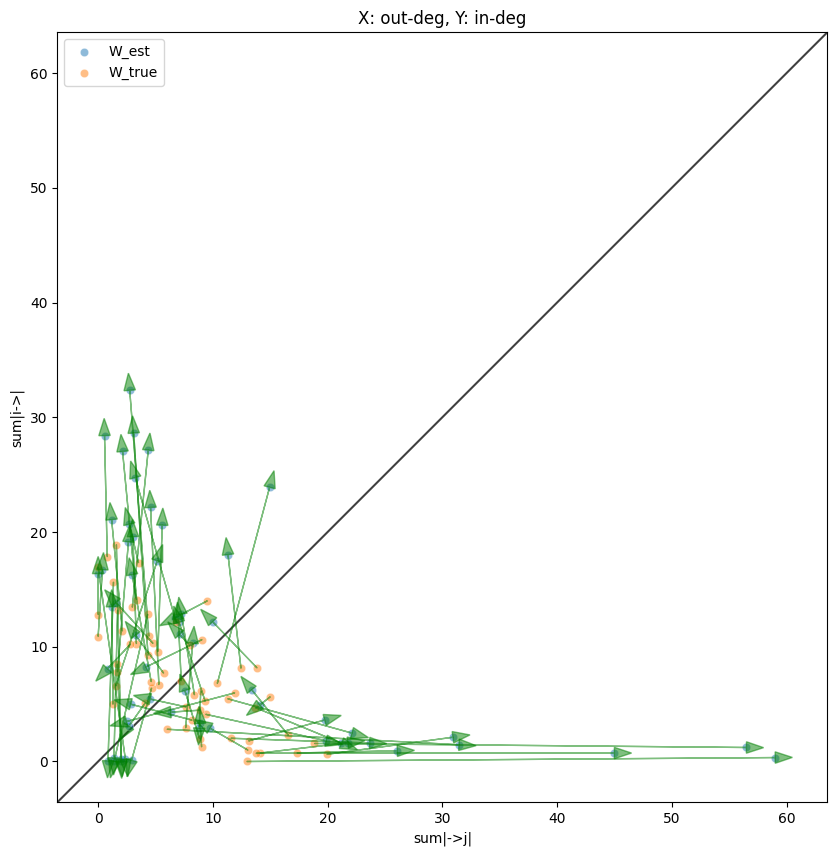

In [184]:
X, W_est, B_true, W_true = load_data_39(60, 6, 1)
G_W_true = nx.DiGraph(W_true)
G_B_true = nx.DiGraph(B_true)
G_W_est = nx.DiGraph(W_est)
G_W_est_39 = G_W_est

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
n_out_w_39, n_in_w_39, n_out_w_true, n_in_w_true = {}, {}, {}, {}
for n in G_W_est_39.nodes:
    n_out_w_39[n] = 0.
    n_in_w_39[n] = 0.
    for _, j, w in G_W_est_39.out_edges(n, data='weight'):
        n_out_w_39[n] += abs(w)
    for i, _, w in G_W_est_39.in_edges(n, data='weight'):
        n_in_w_39[n] += abs(w)

for n in G_W_true.nodes:
    n_out_w_true[n] = 0.
    n_in_w_true[n] = 0.
    for _, j, w in G_W_true.out_edges(n, data='weight'):
        n_out_w_true[n] += abs(w)
    for i, _, w in G_W_true.in_edges(n, data='weight'):
        n_in_w_true[n] += abs(w)
        
X_est, Y_est = [], []

for i in G_W_est_39.nodes():
    X_est.append(n_in_w_39[i])
    Y_est.append(n_out_w_39[i])
sns.scatterplot(x=X_est, y=Y_est, alpha=0.5, ax=ax, label='W_est')   

""""""
X_true, Y_true = [], []

for i in G_W_est_39.nodes():
    X_true.append(n_in_w_true[i])
    Y_true.append(n_out_w_true[i])
sns.scatterplot(x=X_true, y=Y_true, alpha=0.5, ax=ax, label="W_true")   
ax.set_xlabel("sum|->j|")
ax.set_ylabel("sum|i->|")

for x_est, y_est, x_true, y_true in zip(X_est, Y_est, X_true, Y_true):
    ax.arrow(x=x_true, y=y_true, dx=x_est-x_true, dy=y_est-y_true, head_width=1, color='green', alpha=0.5)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title("X: out-deg, Y: in-deg")
